### Step_1 : Importing and Understanding Data

In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',300)
pd.options.display.float_format = '{:.2f}'.format

In [91]:
# Importing advertising.csv
CT_Ananlysis = pd.read_csv('CT Ananlysis.csv')

In [92]:
# Looking at the first five rows
CT_Ananlysis.head()

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,O365 Exchange,ActiveDirectory,East Europe,Not Restricted,Hub,Not Mainstream,False,False,Growth,False,0,3,1,16,82
1,O365 Exchange,ActiveDirectory,Europe North 2,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,16,82
2,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,20,97
3,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,35,101
4,O365 Exchange,ActiveDirectory,North Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,4,1,46,101


In [93]:
# What type of values are stored in the columns?
CT_Ananlysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 15 columns):
EngineeringGroup        7074 non-null object
PlanResourceTypeName    7074 non-null object
Region                  7074 non-null object
RegionGroup             7074 non-null object
RegionType              7074 non-null object
IsMainstream            7074 non-null object
NewRegionFlag           7074 non-null bool
NewDCFlag               7074 non-null bool
PlanIntentName          7074 non-null object
IsNPI                   7074 non-null bool
NewTechFlag             7074 non-null int64
DeploymentSeverity      7074 non-null int64
NumberOfRacks           7074 non-null int64
_CT_SIGNAL_TO_DOCK      7074 non-null int64
_CT_SIGNAL_TO_LIVE      7074 non-null int64
dtypes: bool(3), int64(5), object(7)
memory usage: 684.0+ KB


In [94]:
cols=['NewTechFlag','DeploymentSeverity','NewRegionFlag','IsNPI','NewDCFlag']
CT_Ananlysis[cols] = CT_Ananlysis[cols].astype('object')

In [95]:
# Let's look at some statistical information about our dataframe.
CT_Ananlysis.describe()

,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
count,7074.00,7074.00,7074.00
mean,13.04,82.68,171.83
std,7.54,45.55,92.00
min,1.00,0.00,8.00
25%,7.00,54.00,103.00
50%,16.00,75.00,154.00
75%,20.00,103.00,217.00
max,60.00,728.00,595.00


### Step_2: Visualising Data

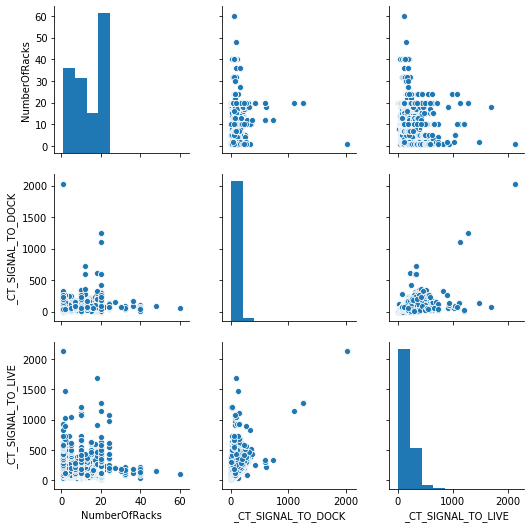

In [73]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(CT_Ananlysis.select_dtypes(include='int64'))

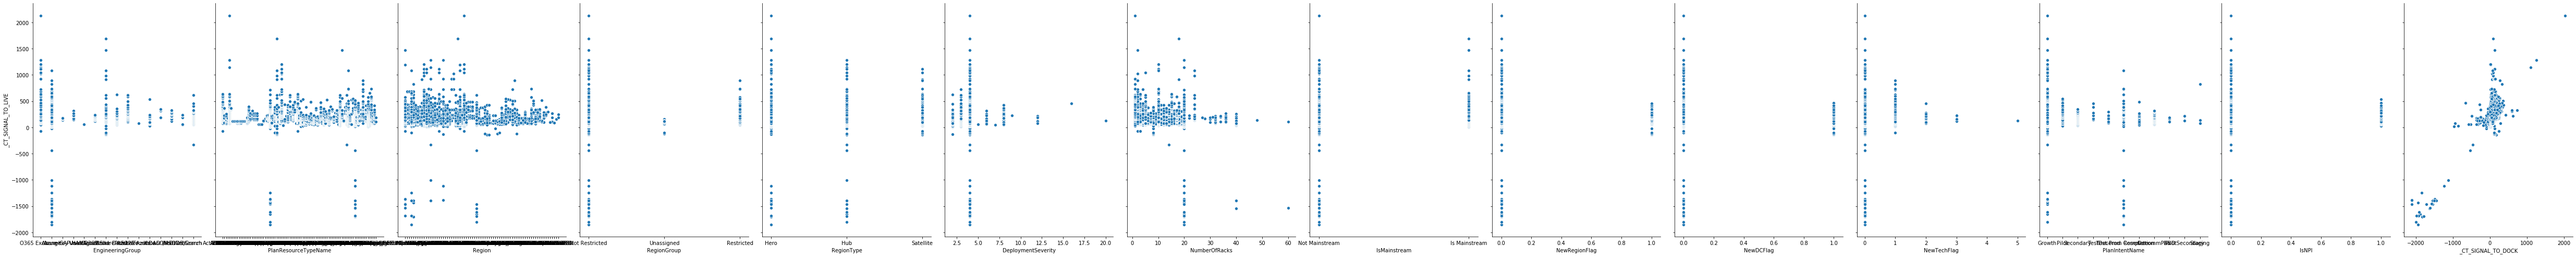

In [44]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(CT_Ananlysis, x_vars=['EngineeringGroup', 'PlanResourceTypeName', 'Region', 'RegionGroup',
       'RegionType', 'DeploymentSeverity', 'NumberOfRacks', 'IsMainstream',
       'NewRegionFlag', 'NewDCFlag', 'NewTechFlag', 'PlanIntentName', 'IsNPI',
       '_CT_SIGNAL_TO_DOCK'], y_vars='_CT_SIGNAL_TO_LIVE',size=7, aspect=0.7, kind='scatter')

### Step_3: Splitting the Data for Training and Testing

In [96]:
CT_Ananlysis_new = CT_Ananlysis.drop(['RegionType','RegionGroup'], axis=1)

In [97]:
CT_Ananlysis2=pd.get_dummies(CT_Ananlysis_new, drop_first=False)

In [98]:
CT_Ananlysis2

,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE,EngineeringGroup_Azure,EngineeringGroup_Azure AD (MSODS),EngineeringGroup_Azure Data Lake,EngineeringGroup_Azure Front Door,EngineeringGroup_Azure Key Vault,EngineeringGroup_CloudBuild,EngineeringGroup_FOPE,EngineeringGroup_NonWebComm,EngineeringGroup_O365 Exchange,EngineeringGroup_O365 SharePoint,EngineeringGroup_OneDrive,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Unassigned,EngineeringGroup_Xbox,PlanResourceTypeName_ADL Storage,PlanResourceTypeName_AKV,PlanResourceTypeName_ActiveDir-S,PlanResourceTypeName_ActiveDirectory,PlanResourceTypeName_BM CRAY CS MT,PlanResourceTypeName_BM CRAY CSIN,PlanResourceTypeName_BM CRAY CSIN MT,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU MT,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM CRAY IN CORE,PlanResourceTypeName_BM CRAY MT CORE,PlanResourceTypeName_BM CRAY MT OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM SAP LI1,PlanResourceTypeName_BM SAP MSEE,PlanResourceTypeName_BM SAP Network,PlanResourceTypeName_BM SAP Storage,PlanResourceTypeName_BM SAP VLI,PlanResourceTypeName_BM VMW CS COMP1,PlanResourceTypeName_BM VMW CS COMP2,PlanResourceTypeName_BM VMW CS MSEE,PlanResourceTypeName_BM VMWare Comp1,PlanResourceTypeName_BackEnd,PlanResourceTypeName_BackEnd-S,PlanResourceTypeName_Cafe,PlanResourceTypeName_CloudBuild,PlanResourceTypeName_Compute,PlanResourceTypeName_Compute HPC Gen 6.0,PlanResourceTypeName_Compute HPC-HB,PlanResourceTypeName_Compute-FAST,PlanResourceTypeName_Compute-SPO,PlanResourceTypeName_Confidential Compute,PlanResourceTypeName_Cosmos,PlanResourceTypeName_DNS,PlanResourceTypeName_Dedicated,PlanResourceTypeName_Dedicated Compute,PlanResourceTypeName_Discrete,PlanResourceTypeName_EOP-Capacity,PlanResourceTypeName_EOP-DI,PlanResourceTypeName_EOP-Global,PlanResourceTypeName_EOP-Sonar/ATP,PlanResourceTypeName_FPGA Compute,PlanResourceTypeName_FrontDoor,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_FrontEnd-S,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_G-ZRS Storage,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute 6.2,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Compute Gen 6.0,PlanResourceTypeName_GPU Machine Learning,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_Godzilla,PlanResourceTypeName_HPC,PlanResourceTypeName_HPC-HBv2,PlanResourceTypeName_Kona/ADL,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_MSODS,PlanResourceTypeName_MSODS - Compute,PlanResourceTypeName_Management,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_OneDrive,PlanResourceTypeName_PRD,PlanResourceTypeName_Passport - Compute,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Remote Viz Gen7,PlanResourceTypeName_Resource Forest,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_SQL Azure (DocDB),PlanResourceTypeName_SQL on Compute,PlanResourceTypeName_SQLDW Local Storage,PlanResourceTypeName_SWE,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_StorageFast,PlanResourceTypeName_Substrate,PlanResourceTypeName_Torus,PlanResourceTypeName_XArchive HDD,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,PlanResourceTypeName_ZRS Storage,PlanResourceTypeName_ZRS StorageFast,Region_APAC North,Region_APAC Southeast 2,Region_Australia Central,Region_Australia Central 2,Region_Australia East,Region_Australia Southeast,Region_Brazil East,Region_Brazil North,Region_Brazil Northeast,Region_Brazil South,Region_Brazil Southeast,Region_Canada Central,Region_Canada East,Region_Central India,Region_Central US,Region_Central US EUAP,Region_Chile Central,Region_China East,Region_China East 2

In [99]:
# Putting feature variable to X
x = CT_Ananlysis2.drop('_CT_SIGNAL_TO_LIVE', axis=1)

# Putting response variable to y
y = CT_Ananlysis2['_CT_SIGNAL_TO_LIVE']

In [100]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

### Step_4 : Performing Linear Regression

In [101]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x_train = sm.add_constant(x_train)
# create a fitted model in one line
lm = sm.OLS(y_train,x_train.astype(float))
lm_result=lm.fit()

C:\Users\keiwezul\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Step_5 : Model Evaluation

In [102]:
# print the coefficients
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:     _CT_SIGNAL_TO_LIVE   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     37.47
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        09:55:58   Log-Likelihood:                -27264.
No. Observations:                4951   AIC:                         5.489e+04
Df Residuals:                    4770   BIC:                         5.607e+04
Df Model:                         180                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### Step_6 : Predictions

In [103]:
# Making predictions using the model
y_pred_train = lm_result.predict(x_train)
y_pred_test = lm_result.predict(sm.add_constant(x_test))

### Step_7: Calculating Error Terms

In [104]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
MAE_train = mean_absolute_error(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [89]:
y_pred_test.to_csv('y_pred_test.csv')
y_test.to_csv('y_test.csv')

C:\Users\keiwezul\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
C:\Users\keiwezul\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [105]:
print('rmse_train :',rmse_train, 'MAE_train', MAE_train)
print('rmse_test :',rmse_test, 'MAE_test', MAE_test)

rmse_train : 59.611808795385414 MAE_train 39.533304082554146
rmse_test : 57.39606504923994 MAE_test 39.96233211930433


Text(0, 0.5, 'Cycle Time')

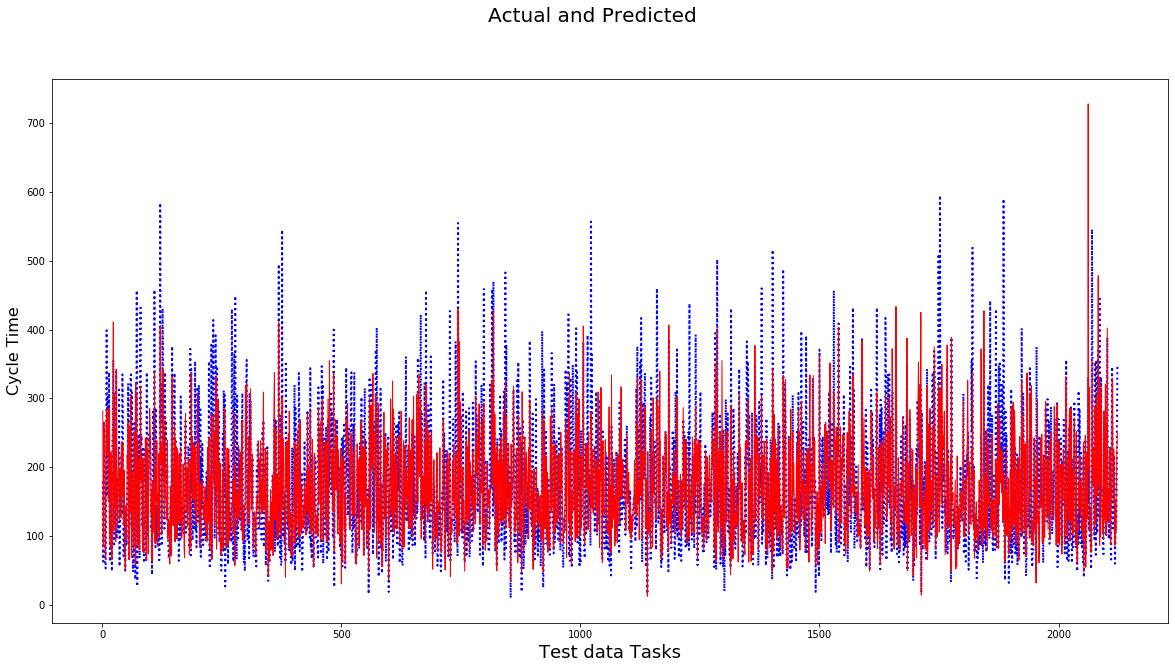

In [108]:
#### Actual vs Predicted
c = [i for i in range(1,2124,1)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test, color="blue", linewidth=2, linestyle=":")
plt.plot(c,y_pred_test, color="red",  linewidth=1, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Test data Tasks', fontsize=18)                               # X-label
plt.ylabel('Cycle Time', fontsize=16)                               # Y-label

In [107]:
x_test.shape

(2123, 206)

Text(0, 0.5, 'Error')

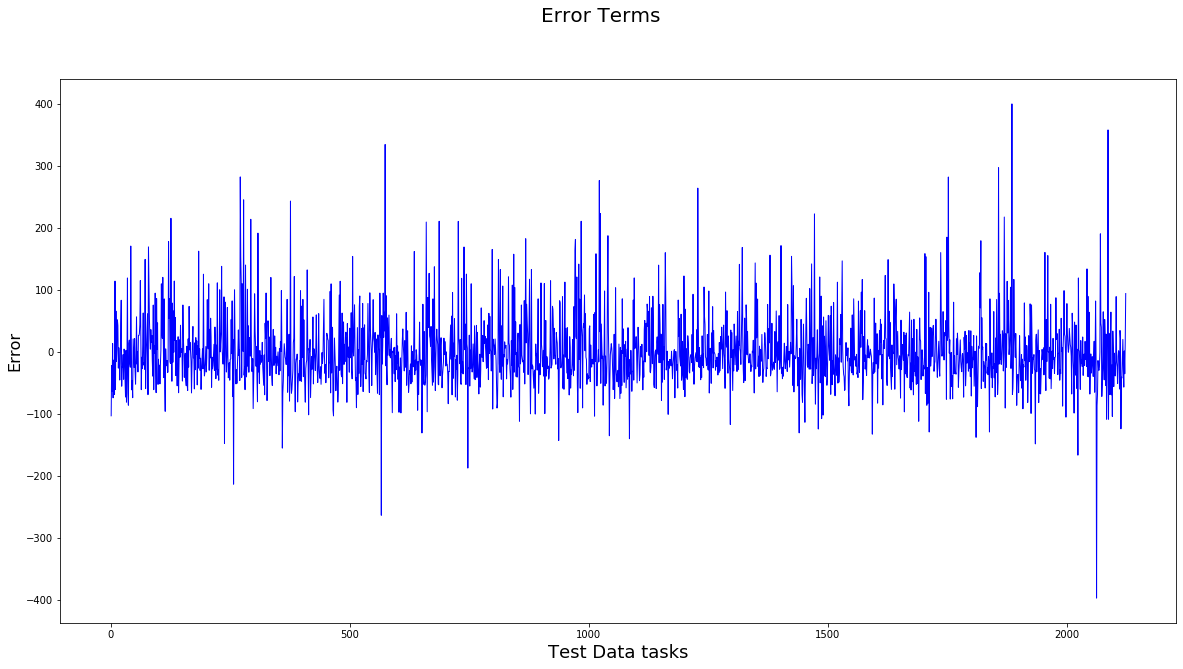

In [109]:
# Error terms
c = [i for i in range(1,2124,1)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test-y_pred_test, color="blue", linewidth=1, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Test Data tasks', fontsize=18)                      # X-label
plt.ylabel('Error', fontsize=16)                # Y-label

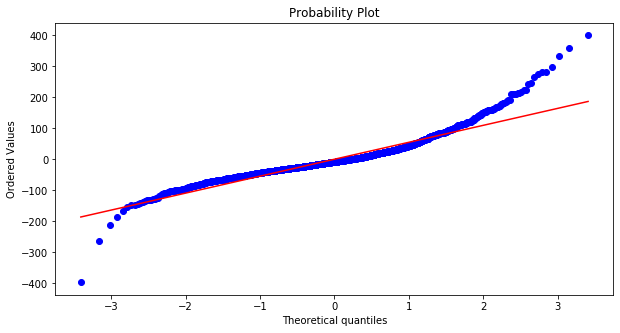

In [110]:
import scipy.stats as stats
import pylab
fig = plt.figure(figsize=(10,5))
stats.probplot(y_test-y_pred_test, dist="norm", plot=pylab)
pylab.show()

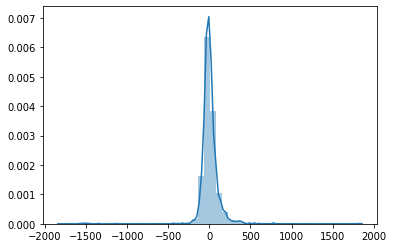

In [30]:
sns.distplot(y_test-y_pred_test)

# Using Random Forest

In [111]:
le=LabelEncoder()
cols=['EngineeringGroup', 'PlanResourceTypeName', 'Region', 'RegionGroup',
       'RegionType', 'IsMainstream', 'NewRegionFlag', 'NewDCFlag',
       'PlanIntentName', 'IsNPI']
CT_Ananlysisrf=CT_Ananlysis.copy()
CT_Ananlysisrf[cols] = CT_Ananlysis[cols].apply(le.fit_transform)

In [112]:
CT_Ananlysisrf

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,8,3,22,0,1,1,0,0,2,0,0,3,1,16,82
1,8,3,28,0,0,1,0,0,2,0,0,3,1,16,82
2,8,3,69,0,0,1,0,0,2,0,0,3,1,20,97
3,8,3,69,0,0,1,0,0,2,0,0,3,1,35,101
4,8,3,40,0,0,1,0,0,2,0,0,4,1,46,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,0,91,69,0,0,1,0,0,3,0,1,4,10,7,298
7070,0,91,23,0,0,1,0,1,3,0,0,4,10,195,339
7071,0,91,72,0,0,1,0,1,3,0,0,4,10,228,417
7072,0,92,69,0,0,1,0,0,2,0,0,4,10,66,108


In [135]:
# Putting feature variable to X
x = CT_Ananlysisrf.drop(['_CT_SIGNAL_TO_LIVE','_CT_SIGNAL_TO_DOCK'], axis=1)

# Putting response variable to y
y = CT_Ananlysisrf['_CT_SIGNAL_TO_LIVE']

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [136]:
# Initialize and fit regressor
tree2 = RandomForestRegressor(criterion='mse',  max_depth=20, n_estimators=100)         
tree2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [137]:
#prediction
y_train_predict=tree2.predict(x_train)
y_test_predict=tree2.predict(x_test)

In [138]:
#Error calculation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
train_MAE = mean_absolute_error(y_train, y_train_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_MAE = mean_absolute_error(y_test, y_test_predict)

In [139]:
print('rmse_train :',train_rmse, 'MAE_train', train_MAE)
print('rmse_test :',test_rmse, 'MAE_test', test_MAE)

rmse_train : 46.18654125385185 MAE_train 30.009548752081862
rmse_test : 64.15878404991294 MAE_test 45.10723496003997


In [ ]:
pd.DataFrame({'gini':tree2.feature_importances_, 'varname':x_train.columns}).sort_values('gini', ascending=False)